In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_banknote_authentication.csv')

In [3]:
data = pd.DataFrame(np.vstack([data.columns, data]))

In [4]:
data.rename({0:'Variance',1:'Skewness',2:'Kurtosis',3:'Entropy',4:'Output'},axis = 1,inplace = True)

In [5]:
data.head()

,Variance,Skewness,Kurtosis,Entropy,Output
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.4621,0.0
2,3.866,-2.6383,1.9242,0.10645,0.0
3,3.4566,9.5228,-4.0112,-3.5944,0.0
4,0.32924,-4.4552,4.5718,-0.9888,0.0


# EDA (Expolratory Data Analysis)

In [6]:
data.isnull().sum()

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Output      0
dtype: int64

In [7]:
data.duplicated().sum()

24

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.dtypes

Variance    object
Skewness    object
Kurtosis    object
Entropy     object
Output      object
dtype: object

In [11]:
data['Variance'] = data['Variance'].astype('float')
data['Skewness'] = data['Skewness'].astype('float')
data['Kurtosis'] = data['Kurtosis'].astype('float')
data['Entropy'] = data['Entropy'].astype('float')
data['Output'] = data['Output'].astype('float')

In [12]:
data.dtypes

Variance    float64
Skewness    float64
Kurtosis    float64
Entropy     float64
Output      float64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Variance'>

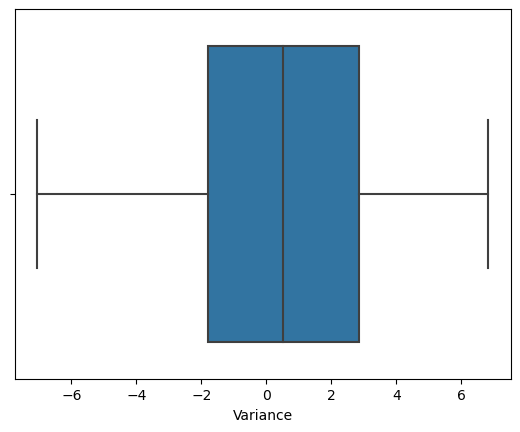

In [13]:
sns.boxplot(data['Variance'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Skewness'>

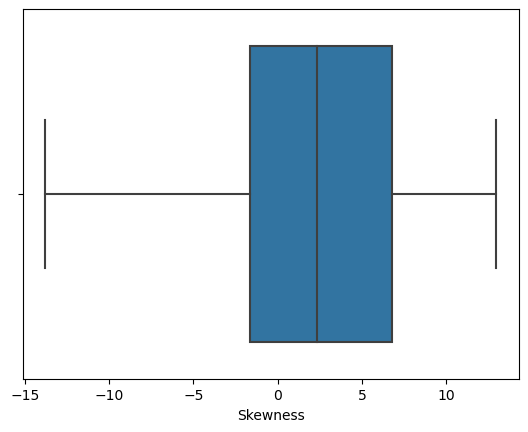

In [14]:
sns.boxplot(data['Skewness'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kurtosis'>

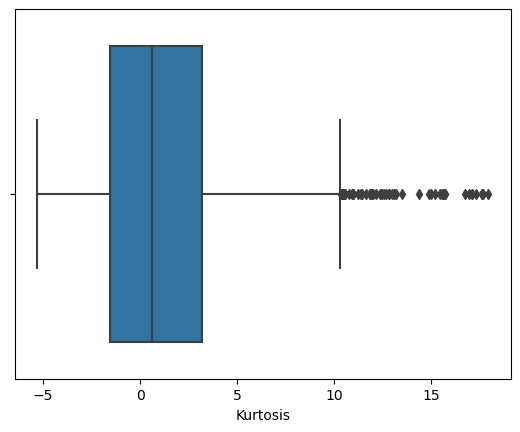

In [15]:
sns.boxplot(data['Kurtosis'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Entropy'>

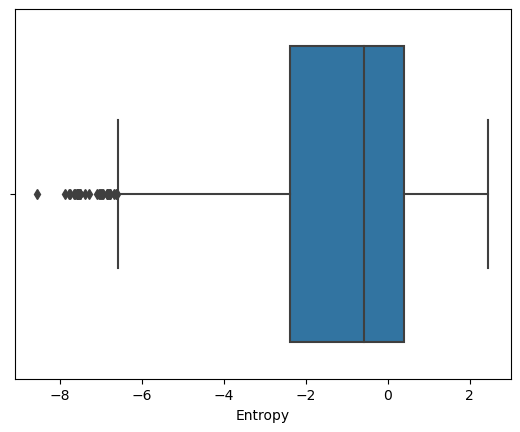

In [16]:
sns.boxplot(data['Entropy'])

In [17]:
def value_changer(x):
    if x == 0:
        return 0.0
    else:
        return 1.0

In [18]:
data['Output'] = data['Output'].apply(value_changer)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Output', ylabel='count'>

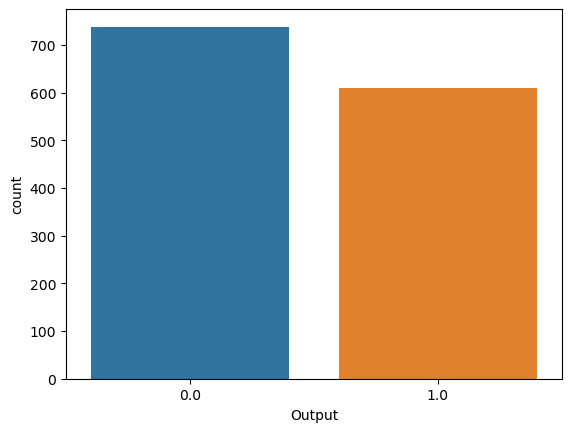

In [19]:
sns.countplot(data.Output)

# Data Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop('Output',axis = 1)
Y = data['Output']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Models

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
DT = DecisionTreeClassifier(criterion="entropy")

In [25]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
DT_pred=DT.predict(X_test)

# SVM

In [27]:
from sklearn import svm

In [28]:
SVM = svm.SVC()

In [29]:
SVM.fit(X_train,y_train)

SVC()

In [30]:
SVM_pred=SVM.predict(X_test)

# Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RF = RandomForestClassifier(n_estimators = 100)

In [33]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
RF_pred=RF.predict(X_test)

# Metrics

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
DT_accuracy=accuracy_score(DT_pred,y_test)*100
SVM_accuracy=accuracy_score(SVM_pred,y_test)*100
RF_accuracy=accuracy_score(RF_pred,y_test)*100
print("Accuracy of the DT model is {:.2f}".format(DT_accuracy))
print("Accuracy of the SVM model is {:.2f}".format(SVM_accuracy))
print("Accuracy of the RF model is {:.2f}".format(RF_accuracy))

Accuracy of the DT model is 97.75
Accuracy of the SVM model is 99.55
Accuracy of the RF model is 98.43
